In [17]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [ ]:
games = pd.read_csv(r"C:\Users\user\Desktop\games.csv") #Чтение датафрэйма

In [5]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
games.shape #Просмотр количества строк

(16598, 11)

In [ ]:
games.isna().sum() #Проверка на наличие пустых строк

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
games.dropna(inplace=True) #Удаление пустых строк

In [ ]:
games.dtypes #Проверка типов данных

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
number_year = games.groupby('Year', as_index=False).agg({'Name':'nunique'}).rename(columns={'Name':'number_game'}) 
#Просмотр количества выпущенных игр по годам

In [ ]:
games.Year = games.Year.astype('int') #Приведение данных в колонке Year к целочисленному типу
games.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

<Axes: xlabel='Year', ylabel='count'>

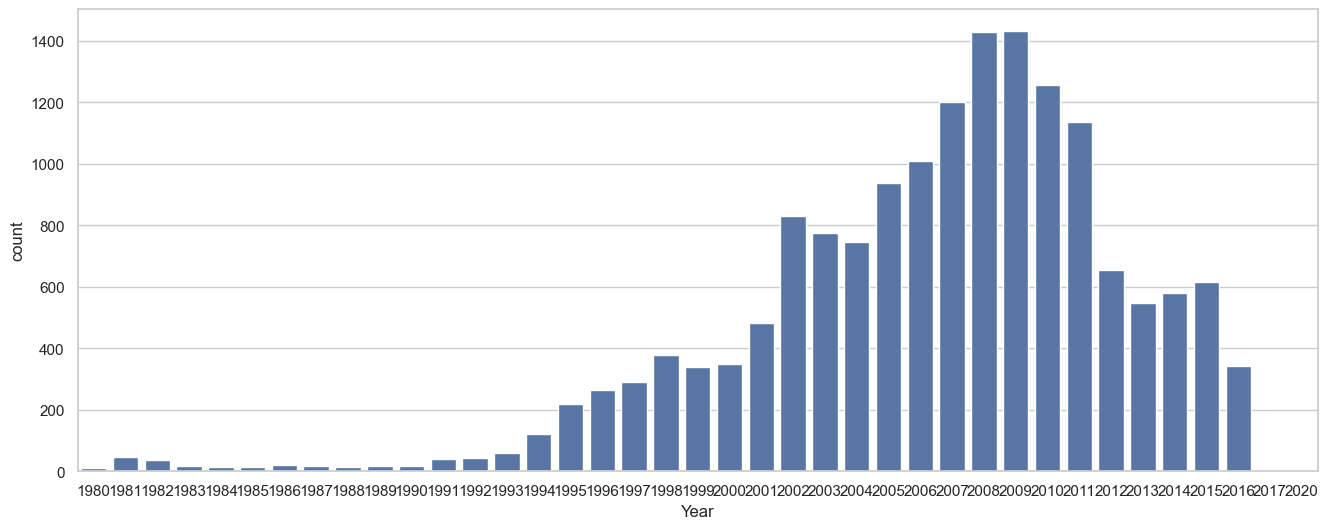

In [ ]:
sns.set(style='whitegrid', rc= {'figure.figsize':(16,6)})
sns.countplot(x = games['Year'], data = games) #Построение распределения количества выпущенных игр по годам

In [ ]:
games.Year.describe() #Просмотр описательной статистики

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [ ]:
ss.mode(games.Year) #Расчёт моды

ModeResult(mode=np.int64(2009), count=np.int64(1431))

In [ ]:
games_platform = games.Platform.value_counts(normalize=True).mul(100).to_frame('pct') 
games_platform.query('pct > 7').index.to_list() #Расчёт частоты возникновения платформ для игр в датафрэйме

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [ ]:
nintendo = games.query('Publisher == "Nintendo"')
nintendo[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].agg(['mean', 'median']) #Расчёт среднего и медианы продаж Nintendo по регионам

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000


In [ ]:
games.query('Publisher == "Nintendo"').groupby(['Genre']).agg({'JP_Sales':'sum'}) #Расчёт суммы продаж Nintendo по жанрам в Японии

,JP_Sales
Genre,
Action,29.16
Adventure,9.01
Fighting,14.94
Misc,55.25
Platform,102.36
Puzzle,37.09
Racing,29.22
Role-Playing,101.95
Shooter,6.03


<Axes: xlabel='Genre', ylabel='JP_Sales'>

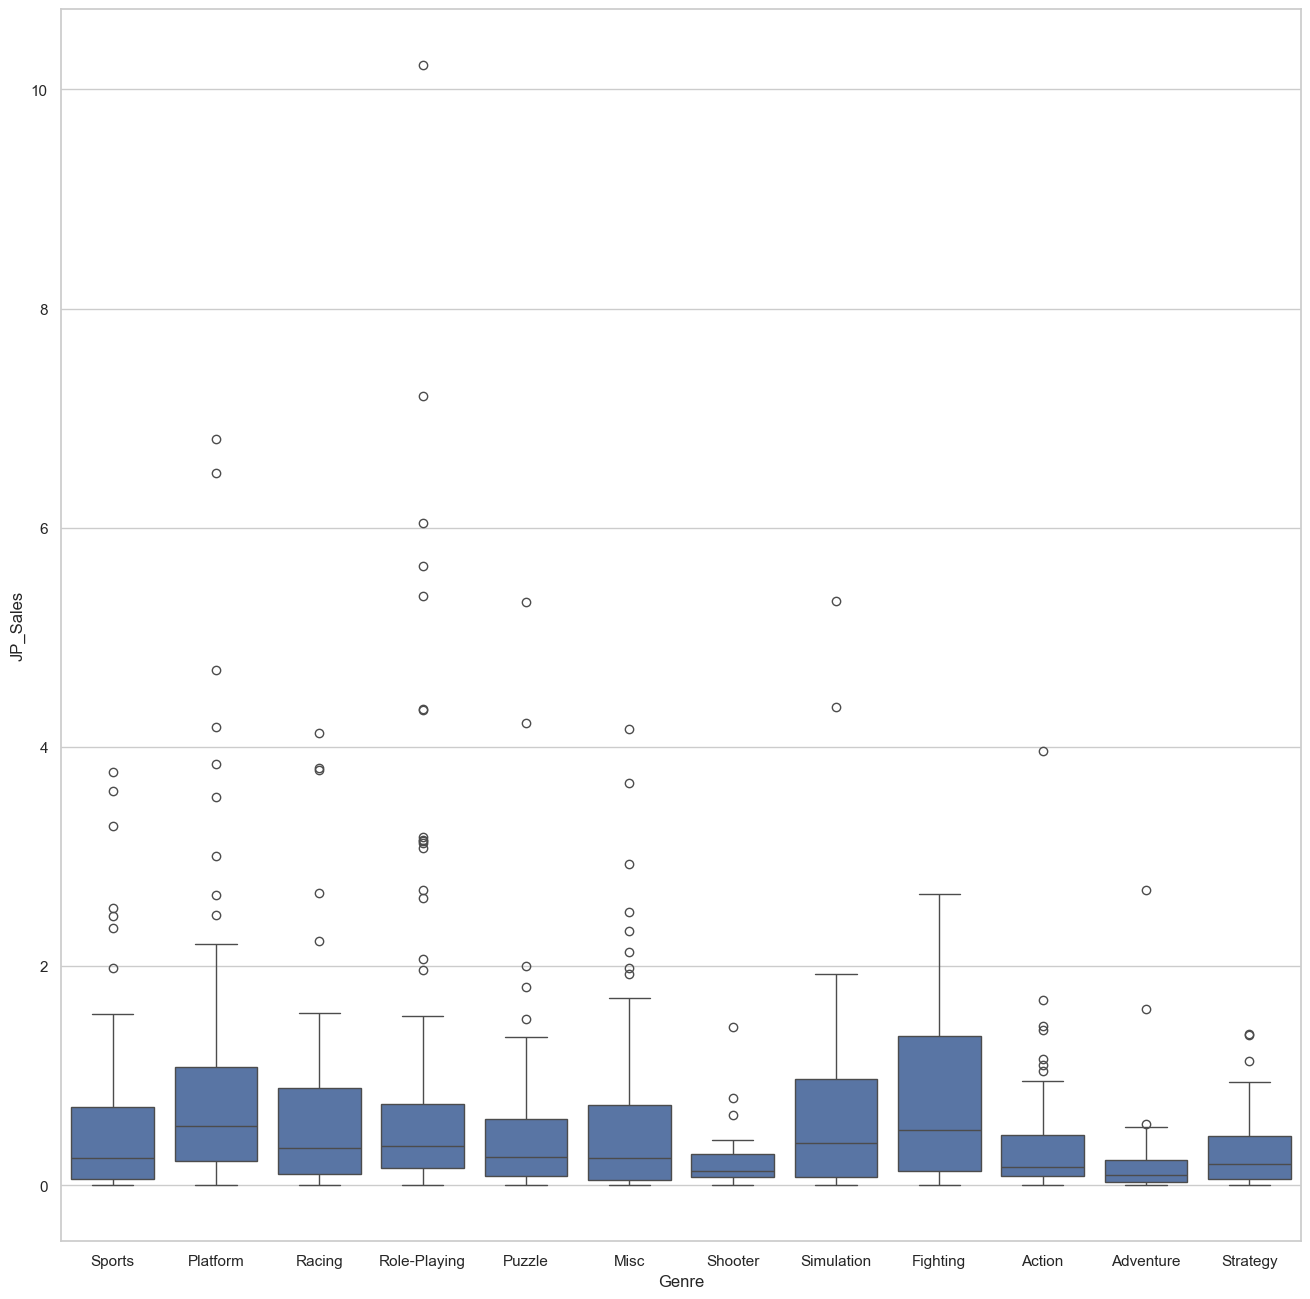

In [ ]:
sns.set(style='whitegrid', rc= {'figure.figsize':(16,16)})
sns.boxplot(data = games.query('Publisher == "Nintendo"'), x = 'Genre', y = 'JP_Sales') #Построение boxplot

In [ ]:
df = nintendo.query("Genre == ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')").groupby(['Year', 'Genre'], as_index = False).agg({'Global_Sales':'sum'})
#Создание датафрэйма для сравнения определённых жанров, сгрупированных по годам

<Axes: xlabel='Year', ylabel='Global_Sales'>

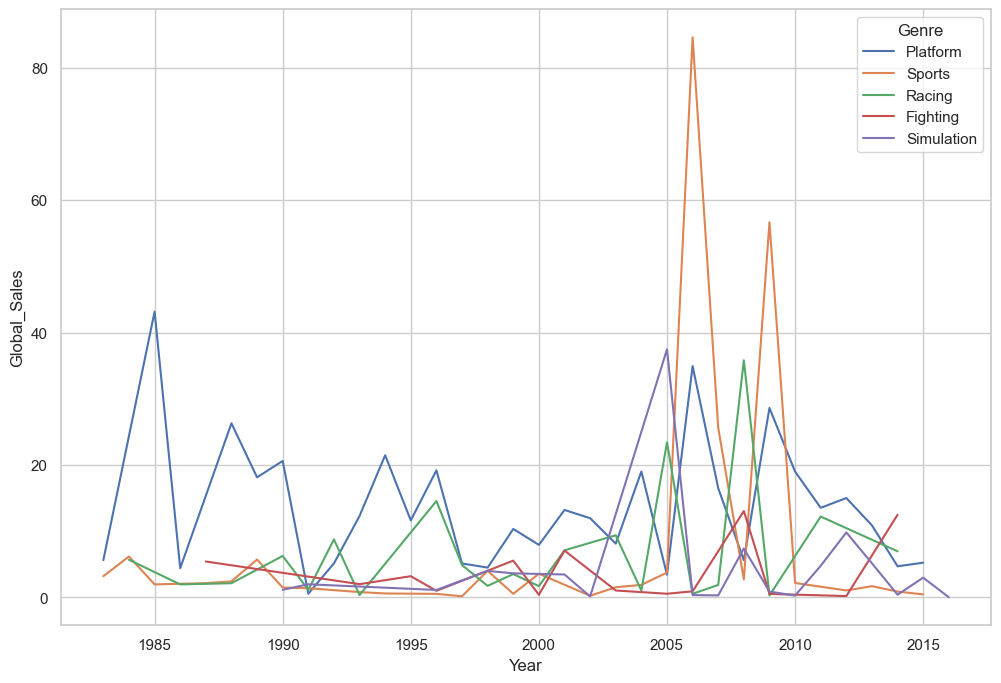

In [ ]:
sns.set(style='whitegrid', rc= {'figure.figsize':(12,8)})
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df) #Построение линейного графика для сравнения жанров по мировым продажам